In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns; sns.set()
from sklearn import svm
import sklearn.metrics as sm
import math
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn import preprocessing
import collections
from matplotlib_venn import venn3
from scipy import stats
from itertools import combinations
import time
from math import comb

In [ ]:
clients = pd.read_csv('/content/drive/Shareddrives/Data Fest 2023/data/clients.csv',  na_values='-')

In [ ]:
clients1=clients.drop(['ClientUno','CreatedUtc','County','StateName','PostalCode'], axis=1)

In [ ]:
questions= pd.read_csv('/content/drive/Shareddrives/Data Fest 2023/data/questions.csv',  na_values='-')

In [ ]:
questions1=questions.iloc[:,4]

In [ ]:
client_questions= pd.concat([clients1, questions1], axis=1)
client_questions

Id StateAbbr          EthnicIdentity   Age  Gender  \
0            1        MS                     NaN   NaN     NaN   
1            2        MS               Caucasian   NaN    Male   
2            3        GA      Latino or Hispanic  55.0    Male   
3            4        TX                   Other  61.0  Female   
4            5        ID               Caucasian  65.0    Male   
...        ...       ...                     ...   ...     ...   
331421  331422        VA  Not Hispanic or Latino   NaN  Female   
331422  331423        VA   I'd rather not answer  79.0  Female   
331423  331424        VA  Not Hispanic or Latino  43.0  Female   
331424  331425        VA  Not Hispanic or Latino  40.0    Male   
331425  331426        VA                     NaN   NaN     NaN   

              MaritalStatus Veteran Imprisoned  NumberInHousehold  \
0                       NaN     NaN         No                3.0   
1       Divorced or Widowed     NaN         No                2.0   
2                    Single     NaN         No                5.0   
3       Married / remarried      No         No                4.0   
4                    Single      No         No                1.0   
...                     ...     ...        ...                ...   
331421               Single      No        NaN                NaN   
331422             Divorced      No         No                2.0   
331423            Separated      No         No                3.0   
331424               Single      No         No                5.0   
331425                  NaN     NaN        NaN                NaN   

        AnnualIncome  AllowedIncome  CheckingBalance  SavingsBalance  \
0            26000.0        37190.0            300.0             NaN   
1               52.0        25390.0              1.0             1.0   
2             3000.0        60790.0              NaN             NaN   
3            15600.0        48990.0            100.0             NaN   
4            15000.0        13590.0            580.0            25.0   
...              ...            ...              ...             ...   
331421           NaN            NaN              NaN             NaN   
331422       18000.0        25390.0             47.0            15.0   
331423        7200.0        37190.0            150.0             0.0   
331424       46000.0        60790.0            150.0             NaN   
331425           NaN            NaN              NaN             NaN   

        InvestmentsBalance                      Category  
0                      NaN           Family and Children  
1                      NaN             Individual Rights  
2                      NaN             Individual Rights  
3                      NaN           Family and Children  
4                      NaN  Consumer Financial Questions  
...                    ...                           ...  
331421                 NaN                           NaN  
331422                 NaN                           NaN  
331423                 NaN                           NaN  
331424                 NaN                           NaN  
331425                 NaN                           NaN  

[331426 rows x 15 columns]

In [ ]:
client_questions_reduced=client_questions.dropna()

In [ ]:
client_questions_reduced

Id StateAbbr         EthnicIdentity   Age  Gender  \
69          70        VT              Caucasian  56.0  Female   
333        334        US              Caucasian  57.0    Male   
388        389        TX  I'd rather not answer  32.0  Female   
412        413        IA              Caucasian  45.0    Male   
456        457        MI              Caucasian  18.0    Male   
...        ...       ...                    ...   ...     ...   
202666  202667        MA              Caucasian  33.0    Male   
202700  202701        MO              Caucasian  60.0    Male   
202725  202726        SC              Caucasian  59.0  Female   
202793  202794        MA              Caucasian  29.0  Female   
202839  202840        MO        Caucasian,Other  19.0    Male   

              MaritalStatus Veteran Imprisoned  NumberInHousehold  \
69      Married / remarried      No         No                2.0   
333     Divorced or Widowed     Yes         No                1.0   
388     Divorced or Widowed     Yes         No                2.0   
412     Married / remarried      No         No                1.0   
456                  Single      No         No                5.0   
...                     ...     ...        ...                ...   
202666               Single      No         No                4.0   
202700  Married / remarried     Yes         No                2.0   
202725  Married / remarried      No         No                2.0   
202793               Single      No         No                3.0   
202839               Single      No         No                2.0   

        AnnualIncome  AllowedIncome  CheckingBalance  SavingsBalance  \
69           19604.0        25390.0             93.0          1500.0   
333          50000.0        13590.0             26.0           546.0   
388          25000.0        25390.0            500.0          1200.0   
412          34000.0        13590.0           2000.0         50000.0   
456        6240000.0        51350.0            599.0           700.0   
...              ...            ...              ...             ...   
202666       75000.0        48990.0           1000.0          1000.0   
202700       80000.0        32470.0            500.0           300.0   
202725       75000.0        25390.0           2000.0         49000.0   
202793       32000.0        37190.0            895.0           165.0   
202839       50000.0        32470.0              0.0             8.0   

        InvestmentsBalance                      Category  
69                  2400.0           Family and Children  
333                  383.0      Housing and Homelessness  
388                  180.0           Family and Children  
412                 8000.0                         Other  
456                  300.0  Consumer Financial Questions  
...                    ...                           ...  
202666               900.0                     Education  
202700              7648.0           Family and Children  
202725             50000.0                         Other  
202793               100.0                         Other  
202839                60.0      Housing and Homelessness  

[4442 rows x 15 columns]

In [ ]:
print(client_questions_reduced['EthnicIdentity'].unique())

['Caucasian' "I'd rather not answer"
 'Asian,Caucasian,Latino or Hispanic,Native Hawaiian / Pacific Islander'
 'African American' 'Asian' 'Caucasian,Latino or Hispanic'
 'Native Hawaiian / Pacific Islander' 'Asian,Caucasian'
 'Native American or Alaska Native' 'African' 'Latino or Hispanic'
 'East Indian' 'Caucasian,Other'
 'Caucasian,Native American or Alaska Native' 'Other'
 'African American,Asian,Caucasian,Latino or Hispanic,Native American or Alaska Native'
 'Asian,Caucasian,Native Hawaiian / Pacific Islander'
 'African American,Native American or Alaska Native'
 'Asian,Native Hawaiian / Pacific Islander' 'Asian,Caucasian,Other'
 'African American,Other' 'Not Hispanic or Latino'
 'Asian,Native American or Alaska Native'
 'Caucasian,Latino or Hispanic,Other' 'Caucasian,Slavic' 'Arab' 'Slavic'
 'African American,Native Hawaiian / Pacific Islander'
 'Hispanic or Latino' 'Caucasian,East Indian' 'African American,Caucasian'
 'Asian,Native Hawaiian / Pacific Islander,Other' 'African Ame

In [ ]:
reduced_ethnicicity_list=['Asian', 'African', 'Caucasian', 'Other', 'Latino or Hispanic', 'African American', 'East Indian', 'Slavic', 'Native Hawaiian / Pacific Islander', 'Native American or Alaska Native', "I'd rather not answer"]

In [ ]:
for i in range(len(client_questions_reduced)):
  if client_questions_reduced.iloc[i,2] not in reduced_ethnicicity_list:
    client_questions_reduced.iloc[i,2]= "Mixed"

In [ ]:
print(client_questions_reduced['EthnicIdentity'].unique())

['Caucasian' "I'd rather not answer" 'Mixed' 'African American' 'Asian'
 'Native Hawaiian / Pacific Islander' 'Native American or Alaska Native'
 'African' 'Latino or Hispanic' 'East Indian' 'Other' 'Slavic']


In [ ]:
state_list=client_questions_reduced['StateAbbr'].unique()
state_list= sorted(state_list)
gender_list=client_questions_reduced['Gender'].unique()
marital_list=client_questions_reduced['MaritalStatus'].unique()
ethnicity_list=client_questions_reduced['EthnicIdentity'].unique()

In [ ]:
clean_data=client_questions_reduced
clean_data['StateAbbr'].replace(state_list, range(len(state_list)), inplace=True)
clean_data['Gender'].replace(gender_list, range(len(gender_list)), inplace=True)
clean_data['MaritalStatus'].replace(marital_list, range(len(marital_list)), inplace=True)
clean_data['EthnicIdentity'].replace(ethnicity_list, range(len(ethnicity_list)), inplace=True)
clean_data['Veteran'].replace(['No', 'Yes'],[0, 1], inplace=True)
clean_data['Imprisoned'].replace(['No', 'Yes'],[0, 1], inplace=True)
clean_data

<ipython-input-17-8e57b17eb5aa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['StateAbbr'].replace(state_list, range(len(state_list)), inplace=True)
<ipython-input-17-8e57b17eb5aa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['Gender'].replace(gender_list, range(len(gender_list)), inplace=True)
<ipython-input-17-8e57b17eb5aa>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['MaritalStatus'].repla

Id  StateAbbr  EthnicIdentity   Age  Gender  MaritalStatus  \
69          70         35               0  56.0       0              0   
333        334         32               0  57.0       1              1   
388        389         31               1  32.0       0              1   
412        413          9               0  45.0       1              0   
456        457         17               0  18.0       1              2   
...        ...        ...             ...   ...     ...            ...   
202666  202667         14               0  33.0       1              2   
202700  202701         18               0  60.0       1              0   
202725  202726         28               0  59.0       0              0   
202793  202794         14               0  29.0       0              2   
202839  202840         18               2  19.0       1              2   

        Veteran  Imprisoned  NumberInHousehold  AnnualIncome  AllowedIncome  \
69            0           0                2.0       19604.0        25390.0   
333           1           0                1.0       50000.0        13590.0   
388           1           0                2.0       25000.0        25390.0   
412           0           0                1.0       34000.0        13590.0   
456           0           0                5.0     6240000.0        51350.0   
...         ...         ...                ...           ...            ...   
202666        0           0                4.0       75000.0        48990.0   
202700        1           0                2.0       80000.0        32470.0   
202725        0           0                2.0       75000.0        25390.0   
202793        0           0                3.0       32000.0        37190.0   
202839        0           0                2.0       50000.0        32470.0   

        CheckingBalance  SavingsBalance  InvestmentsBalance  \
69                 93.0          1500.0              2400.0   
333                26.0           546.0               383.0   
388               500.0          1200.0               180.0   
412              2000.0         50000.0              8000.0   
456               599.0           700.0               300.0   
...                 ...             ...                 ...   
202666           1000.0          1000.0               900.0   
202700            500.0           300.0              7648.0   
202725           2000.0         49000.0             50000.0   
202793            895.0           165.0               100.0   
202839              0.0             8.0                60.0   

                            Category  
69               Family and Children  
333         Housing and Homelessness  
388              Family and Children  
412                            Other  
456     Consumer Financial Questions  
...                              ...  
202666                     Education  
202700           Family and Children  
202725                         Other  
202793                         Other  
202839      Housing and Homelessness  

[4442 rows x 15 columns]

In [ ]:
clean_data1=clean_data
clean_data1.insert(14, "Money", 0 )
for i in range(len(clean_data1)):
  clean_data1.iloc[i,14]=(clean_data1.iloc[i,9]+clean_data1.iloc[i,10]+clean_data1.iloc[i,11]+clean_data1.iloc[i,12]+clean_data1.iloc[i,13])/clean_data1.iloc[i,8]
clean_data1

Id  StateAbbr  EthnicIdentity   Age  Gender  MaritalStatus  \
69          70         35               0  56.0       0              0   
333        334         32               0  57.0       1              1   
388        389         31               1  32.0       0              1   
412        413          9               0  45.0       1              0   
456        457         17               0  18.0       1              2   
...        ...        ...             ...   ...     ...            ...   
202666  202667         14               0  33.0       1              2   
202700  202701         18               0  60.0       1              0   
202725  202726         28               0  59.0       0              0   
202793  202794         14               0  29.0       0              2   
202839  202840         18               2  19.0       1              2   

        Veteran  Imprisoned  NumberInHousehold  AnnualIncome  AllowedIncome  \
69            0           0                2.0       19604.0        25390.0   
333           1           0                1.0       50000.0        13590.0   
388           1           0                2.0       25000.0        25390.0   
412           0           0                1.0       34000.0        13590.0   
456           0           0                5.0     6240000.0        51350.0   
...         ...         ...                ...           ...            ...   
202666        0           0                4.0       75000.0        48990.0   
202700        1           0                2.0       80000.0        32470.0   
202725        0           0                2.0       75000.0        25390.0   
202793        0           0                3.0       32000.0        37190.0   
202839        0           0                2.0       50000.0        32470.0   

        CheckingBalance  SavingsBalance  InvestmentsBalance      Money  \
69                 93.0          1500.0              2400.0    24493.5   
333                26.0           546.0               383.0    64545.0   
388               500.0          1200.0               180.0    26135.0   
412              2000.0         50000.0              8000.0   107590.0   
456               599.0           700.0               300.0  1258589.8   
...                 ...             ...                 ...        ...   
202666           1000.0          1000.0               900.0    31722.5   
202700            500.0           300.0              7648.0    60459.0   
202725           2000.0         49000.0             50000.0   100695.0   
202793            895.0           165.0               100.0    23450.0   
202839              0.0             8.0                60.0    41269.0   

                            Category  
69               Family and Children  
333         Housing and Homelessness  
388              Family and Children  
412                            Other  
456     Consumer Financial Questions  
...                              ...  
202666                     Education  
202700           Family and Children  
202725                         Other  
202793                         Other  
202839      Housing and Homelessness  

[4442 rows x 16 columns]

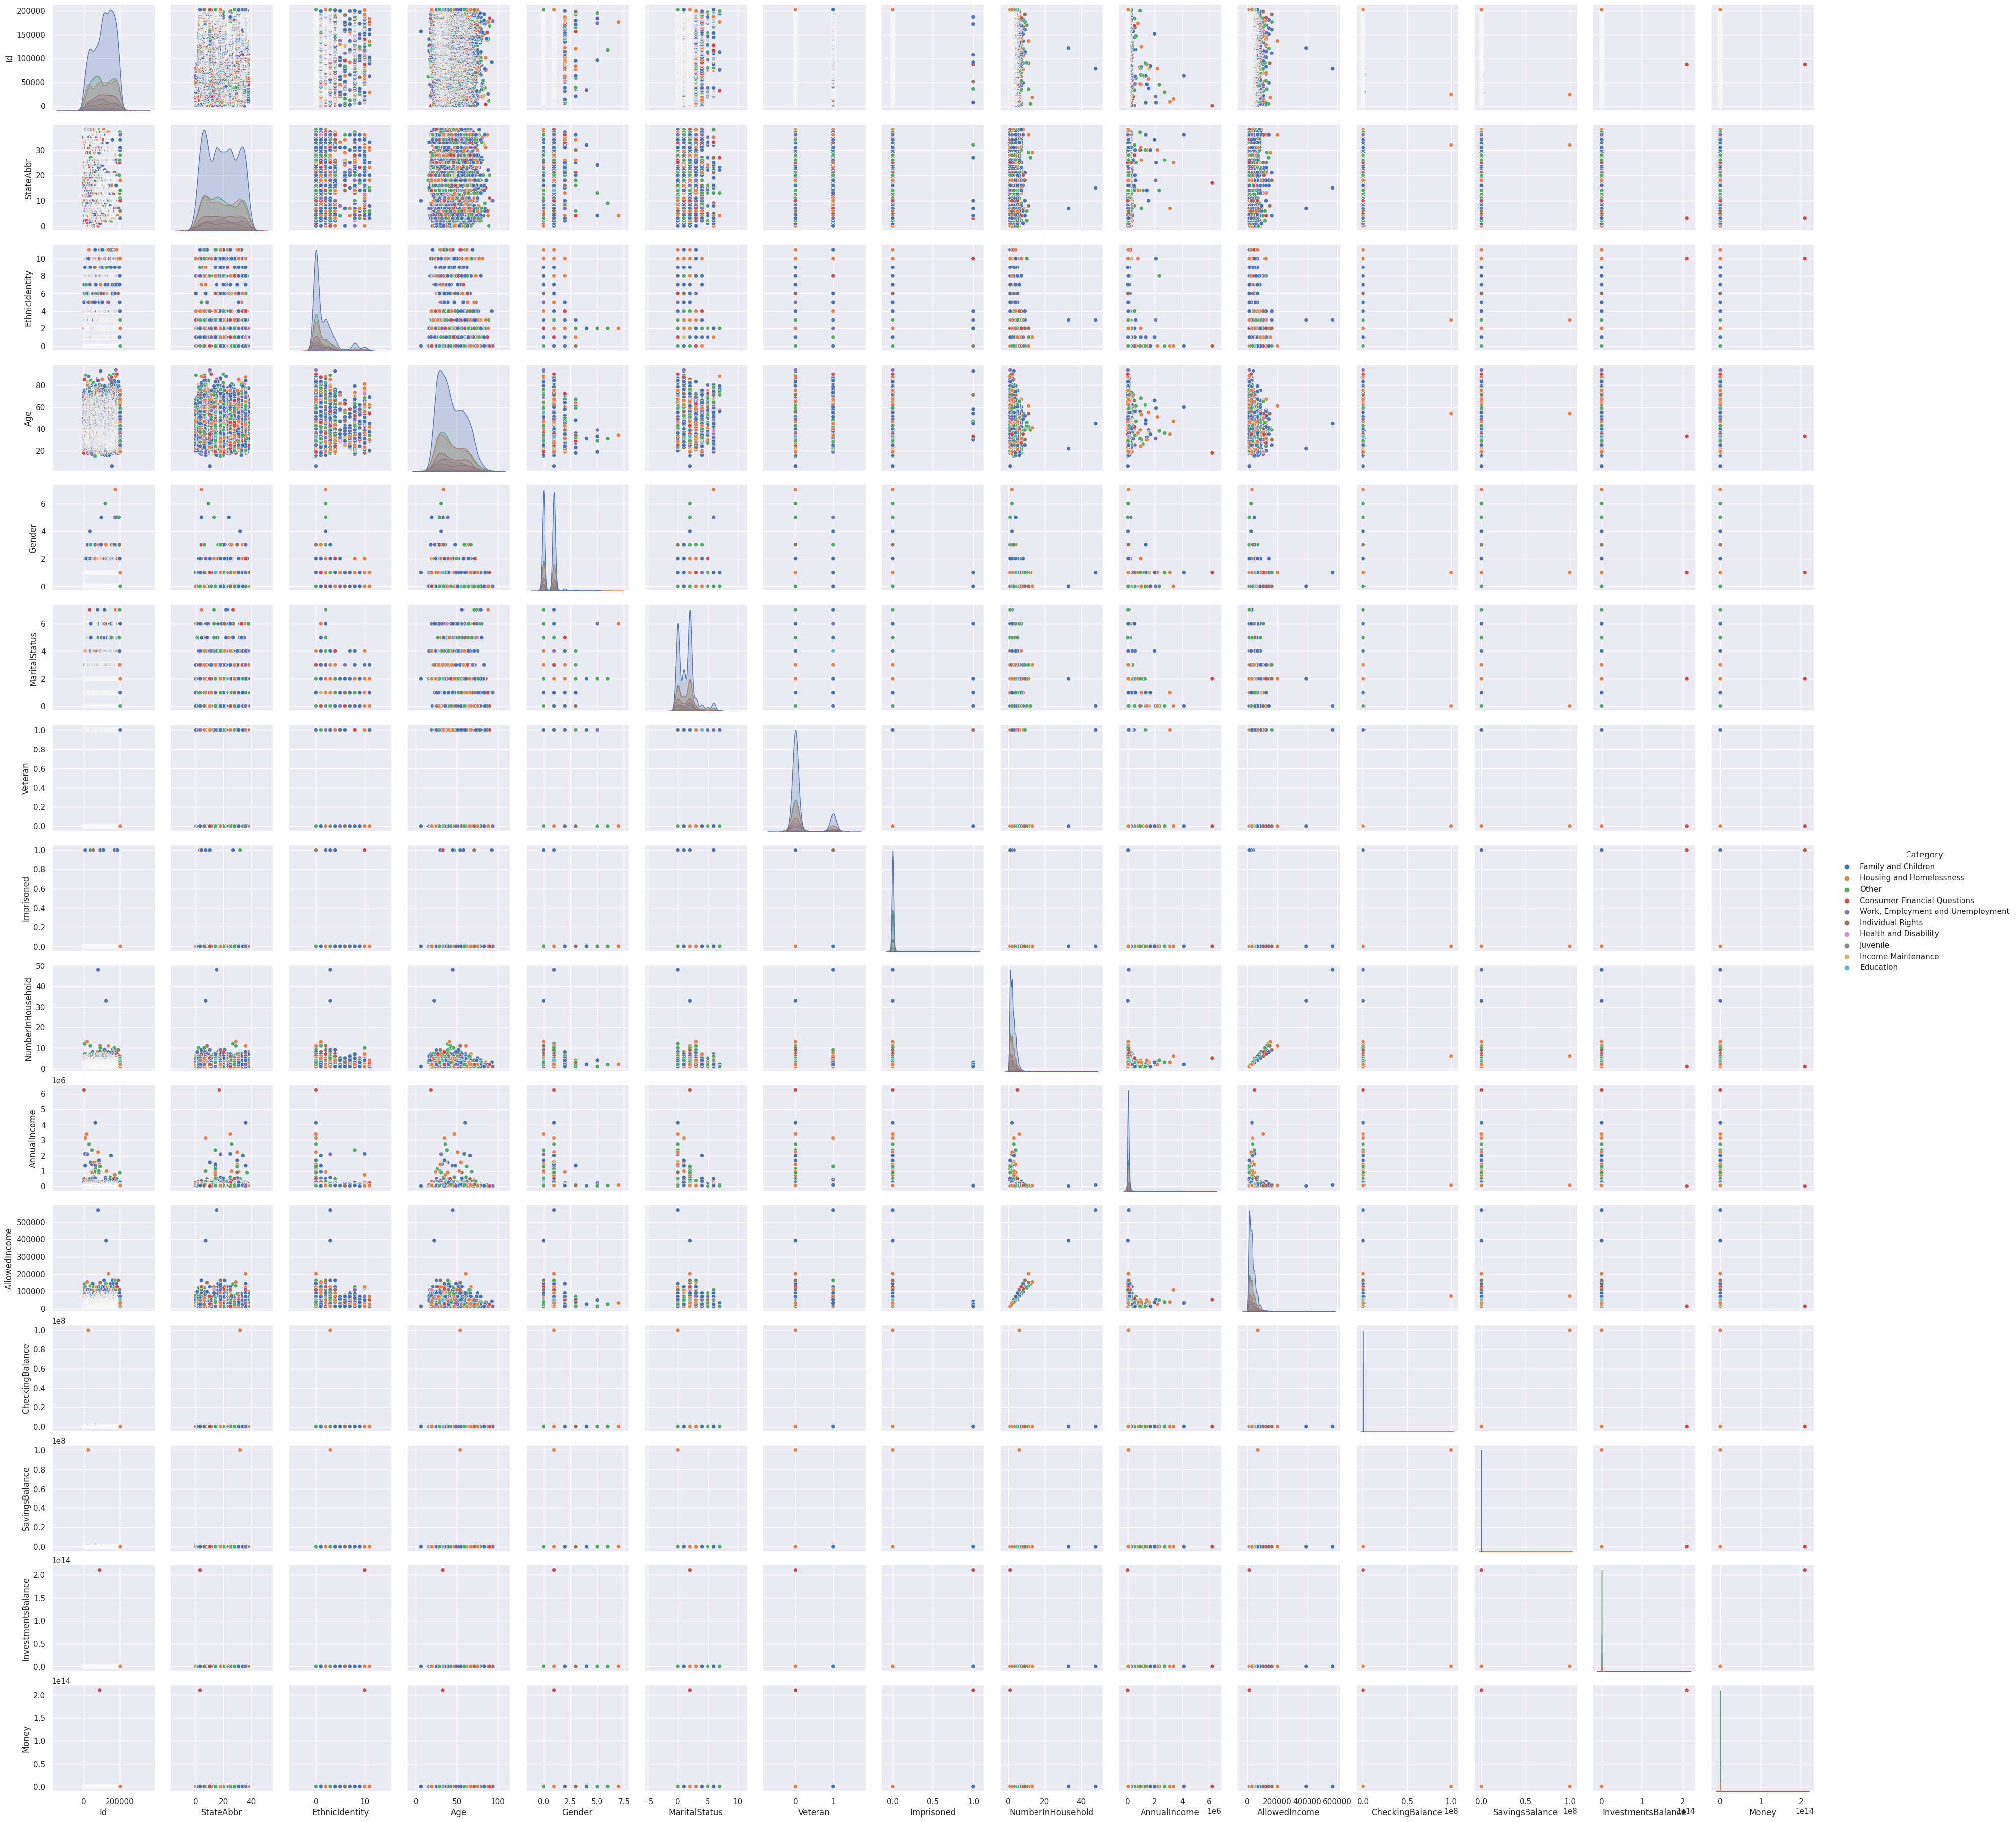

In [ ]:
#model the data in a pairplot using the new column as a classifier
sns.pairplot(clean_data1, height=2.5, hue='Category')

In [ ]:
#happinessX is all the columns of attributes
clientX= clean_data1.iloc[:,1:15]
#happinessY is the new happiness classifier column
clientY= clean_data1.iloc[:,15]

In [ ]:
#split the data to train and test
X_train, X_test, y_train, y_test = train_test_split(clientX, clientY, test_size=0.33, random_state=1)

In [ ]:
clientX

StateAbbr  EthnicIdentity   Age  Gender  MaritalStatus  Veteran  \
69             35               0  56.0       0              0        0   
333            32               0  57.0       1              1        1   
388            31               1  32.0       0              1        1   
412             9               0  45.0       1              0        0   
456            17               0  18.0       1              2        0   
...           ...             ...   ...     ...            ...      ...   
202666         14               0  33.0       1              2        0   
202700         18               0  60.0       1              0        1   
202725         28               0  59.0       0              0        0   
202793         14               0  29.0       0              2        0   
202839         18               2  19.0       1              2        0   

        Imprisoned  NumberInHousehold  AnnualIncome  AllowedIncome  \
69               0                2.0       19604.0        25390.0   
333              0                1.0       50000.0        13590.0   
388              0                2.0       25000.0        25390.0   
412              0                1.0       34000.0        13590.0   
456              0                5.0     6240000.0        51350.0   
...            ...                ...           ...            ...   
202666           0                4.0       75000.0        48990.0   
202700           0                2.0       80000.0        32470.0   
202725           0                2.0       75000.0        25390.0   
202793           0                3.0       32000.0        37190.0   
202839           0                2.0       50000.0        32470.0   

        CheckingBalance  SavingsBalance  InvestmentsBalance      Money  
69                 93.0          1500.0              2400.0    24493.5  
333                26.0           546.0               383.0    64545.0  
388               500.0          1200.0               180.0    26135.0  
412              2000.0         50000.0              8000.0   107590.0  
456               599.0           700.0               300.0  1258589.8  
...                 ...             ...                 ...        ...  
202666           1000.0          1000.0               900.0    31722.5  
202700            500.0           300.0              7648.0    60459.0  
202725           2000.0         49000.0             50000.0   100695.0  
202793            895.0           165.0               100.0    23450.0  
202839              0.0             8.0                60.0    41269.0  

[4442 rows x 14 columns]

In [ ]:
#create a logistic regression model
logreg = LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state=1)
#fit the data
logreg.fit(X_train, y_train)
#examine the accuracy of the logreg model using test data
logreg.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.4713506139154161

Feature: 0, Score: -0.00000
Feature: 1, Score: -0.00000
Feature: 2, Score: -0.00000
Feature: 3, Score: -0.00000
Feature: 4, Score: -0.00000
Feature: 5, Score: -0.00000
Feature: 6, Score: -0.00000
Feature: 7, Score: -0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: -0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000


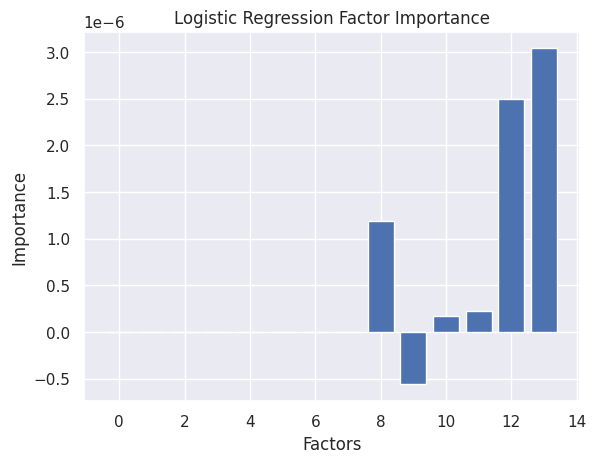

In [ ]:
# get importance
#labels=['GDP','Social Support','Life Expectancy','Freedom','Generosity','Corruption']
importance = logreg.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.xlabel('Factors')
plt.ylabel('Importance')
plt.title('Logistic Regression Factor Importance')
plt.show()

In [ ]:
clf = svm.SVC(gamma='scale')
#fit the data
clf.fit(X_train, y_train)
#examine the accuracy of the svc model using test data
clf.score(X_test, y_test)

0.4733969986357435

In [ ]:
#define the model
model = RandomForestClassifier()
#train the random forest classifier
model.fit(X_train, y_train)
#test the random forest classifier with test data
model.score(X_test,y_test)

0.44679399727148705

Feature: 0, Score: 0.10067
Feature: 1, Score: 0.04588
Feature: 2, Score: 0.11027
Feature: 3, Score: 0.02760
Feature: 4, Score: 0.04309
Feature: 5, Score: 0.01604
Feature: 6, Score: 0.00037
Feature: 7, Score: 0.03732
Feature: 8, Score: 0.10878
Feature: 9, Score: 0.05881
Feature: 10, Score: 0.11234
Feature: 11, Score: 0.10655
Feature: 12, Score: 0.11102
Feature: 13, Score: 0.12127


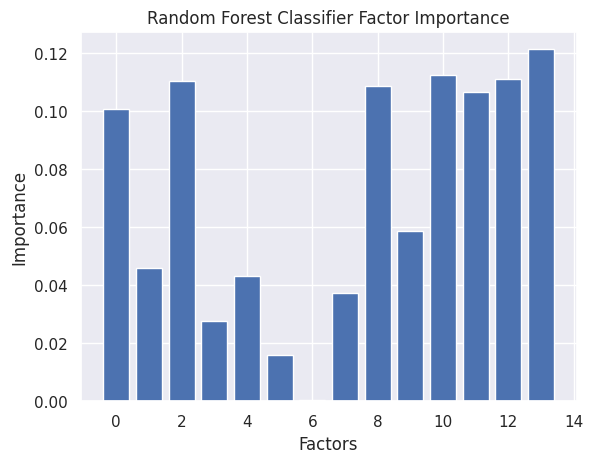

In [ ]:
importance1 = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance1):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance1))], importance1)
plt.xlabel('Factors')
plt.ylabel('Importance')
plt.title('Random Forest Classifier Factor Importance')
plt.show()

[Text(0.5597545059236396, 0.9852941176470589, 'x[12] <= -10.0\ngini = 0.723\nsamples = 4442\nvalue = [357, 20, 2031, 55, 734, 57, 176, 5, 762, 245]'),
 Text(0.42897346400233016, 0.9558823529411765, 'x[12] <= -1550.0\ngini = 0.375\nsamples = 4\nvalue = [3, 0, 1, 0, 0, 0, 0, 0, 0, 0]'),
 Text(0.4284114096938326, 0.9264705882352942, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]'),
 Text(0.42953551831082776, 0.9264705882352942, 'gini = 0.0\nsamples = 3\nvalue = [3, 0, 0, 0, 0, 0, 0, 0, 0, 0]'),
 Text(0.6905355478449491, 0.9558823529411765, 'x[1] <= 3.5\ngini = 0.723\nsamples = 4438\nvalue = [354, 20, 2030, 55, 734, 57, 176, 5, 762, 245]'),
 Text(0.4306596269278229, 0.9264705882352942, 'x[0] <= 4.5\ngini = 0.724\nsamples = 3859\nvalue = [315, 18, 1754, 46, 621, 50, 149, 5, 685, 216]'),
 Text(0.0680210583746092, 0.8970588235294118, 'x[8] <= 71000.0\ngini = 0.687\nsamples = 450\nvalue = [39, 1, 229, 5, 70, 8, 16, 2, 63, 17]'),
 Text(0.04560845672181824, 0.8676470588235294, 

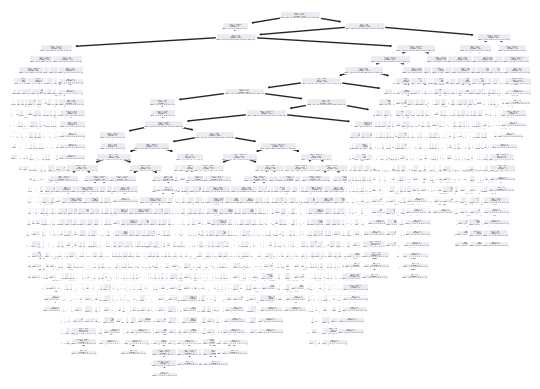

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(clientX, clientY)
tree.plot_tree(clf)

In [ ]:
clf.score(clientX, clientY)

0.9997748761819001

In [ ]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("df")
graph

In [ ]:
df8=clean_data1.iloc[:,[9,15]]
df8['Classification']=0
for i in range(len(df8['Classification'])):
  if df8.iloc[i,0] < np.percentile(df8['AnnualIncome'],25):
    df8.iloc[i,2]=1
  if df8.iloc[i,0]>=np.percentile(df8['AnnualIncome'],25) and df8.iloc[i,0]<np.percentile(df8['AnnualIncome'],50):
    df8.iloc[i,2]=2
  if df8.iloc[i,0]>=np.percentile(df8['AnnualIncome'],50) and df8.iloc[i,0]<np.percentile(df8['AnnualIncome'],75):
    df8.iloc[i,2]=3
  if df8.iloc[i,0]>=np.percentile(df8['AnnualIncome'],75):
    df8.iloc[i,2]=4
df8

<ipython-input-31-d1a86f19754d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df8['Classification']=0


AnnualIncome                      Category  Classification
69           19604.0           Family and Children               1
333          50000.0      Housing and Homelessness               3
388          25000.0           Family and Children               2
412          34000.0                         Other               2
456        6240000.0  Consumer Financial Questions               4
...              ...                           ...             ...
202666       75000.0                     Education               4
202700       80000.0           Family and Children               4
202725       75000.0                         Other               4
202793       32000.0                         Other               2
202839       50000.0      Housing and Homelessness               3

[4442 rows x 3 columns]

In [ ]:
#group by genotype
g1= df8.groupby('Classification')
for id, id_df in g1:
  print(id)
  print(id_df)

1
        AnnualIncome                           Category  Classification
69           19604.0                Family and Children               1
1042          5000.0                Family and Children               1
1506          3000.0  Work, Employment and Unemployment               1
1552         16424.0  Work, Employment and Unemployment               1
1564         20000.0                  Individual Rights               1
...              ...                                ...             ...
201693           0.0           Housing and Homelessness               1
202197           0.0           Housing and Homelessness               1
202498        8868.0       Consumer Financial Questions               1
202501       15600.0           Housing and Homelessness               1
202649       15000.0  Work, Employment and Unemployment               1

[1097 rows x 3 columns]
2
        AnnualIncome                      Category  Classification
388          25000.0           Family an

In [ ]:
df81=g1.get_group(1)
df81=df81.drop(['AnnualIncome'], axis=1)
pie81=df81.groupby('Category').size()
#plt.pie(pie81.values, labels = pie81.index)

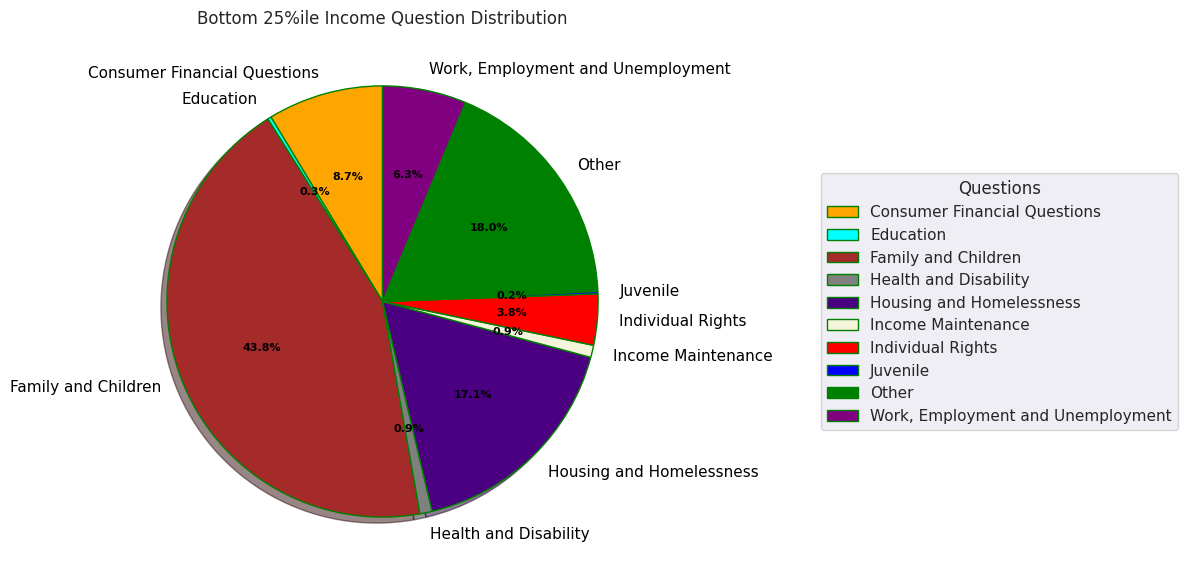

In [ ]:
# Creating dataset
labels = pie81.index
data = pie81.values
#explode = (0.1, 0.0, 0.3, 0.0, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0)

# Creating color parameters
colors = ( "orange", "cyan", "brown", "grey", "indigo", "beige", "red", "blue", "green", "purple")

# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }

# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%".format(pct, absolute)

# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data,
                                  autopct = lambda pct: func(pct, data),
                                  #explode = explode,
                                  labels = labels,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))

# Adding legend
ax.legend(wedges, labels,
          title ="Questions",
          loc ="center left",
          bbox_to_anchor =(1.3, 0, 0.5, 1))

plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Bottom 25%ile Income Question Distribution")

# show plot
plt.savefig('Bottom25Income.png')
plt.show()

In [ ]:
df82=g1.get_group(2)
df82=df82.drop(['AnnualIncome'], axis=1)
pie82=df82.groupby('Category').size()

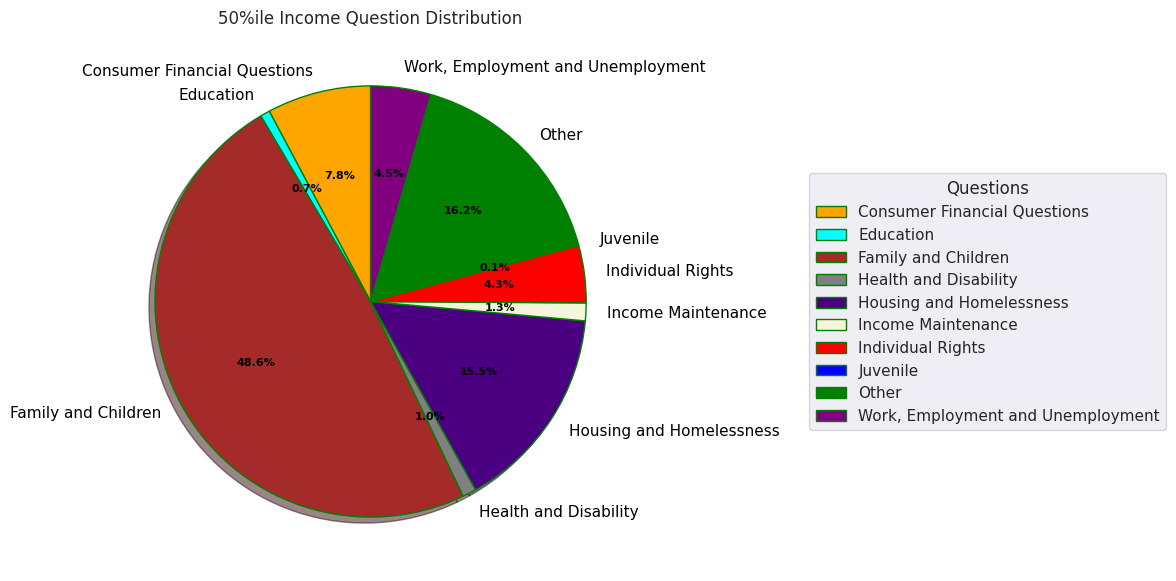

In [ ]:
# Creating dataset
labels = pie82.index
data = pie82.values
#explode = (0.1, 0.0, 0.3, 0.0, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0)

# Creating color parameters
colors = ( "orange", "cyan", "brown", "grey", "indigo", "beige", "red", "blue", "green", "purple")

# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }

# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%".format(pct, absolute)

# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data,
                                  autopct = lambda pct: func(pct, data),
                                  #explode = explode,
                                  labels = labels,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))

# Adding legend
ax.legend(wedges, labels,
          title ="Questions",
          loc ="center left",
          bbox_to_anchor =(1.3, 0, 0.5, 1))

plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("50%ile Income Question Distribution")

# show plot
plt.show()

In [ ]:
df83=g1.get_group(3)
df83=df83.drop(['AnnualIncome'], axis=1)
pie83=df83.groupby('Category').size()

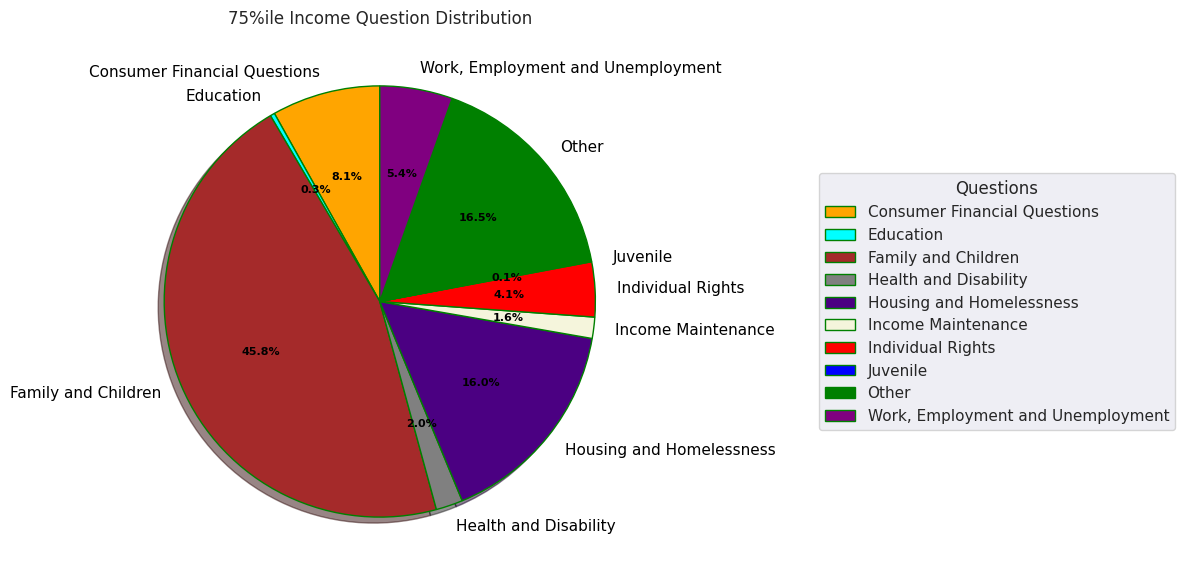

In [ ]:
# Creating dataset
labels = pie83.index
data = pie83.values
#explode = (0.1, 0.0, 0.3, 0.0, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0)

# Creating color parameters
colors = ( "orange", "cyan", "brown", "grey", "indigo", "beige", "red", "blue", "green", "purple")

# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }

# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%".format(pct, absolute)

# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data,
                                  autopct = lambda pct: func(pct, data),
                                  #explode = explode,
                                  labels = labels,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))

# Adding legend
ax.legend(wedges, labels,
          title ="Questions",
          loc ="center left",
          bbox_to_anchor =(1.3, 0, 0.5, 1))

plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("75%ile Income Question Distribution")

# show plot
plt.show()

In [ ]:
df84=g1.get_group(4)
df84=df84.drop(['AnnualIncome'], axis=1)
pie84=df84.groupby('Category').size()

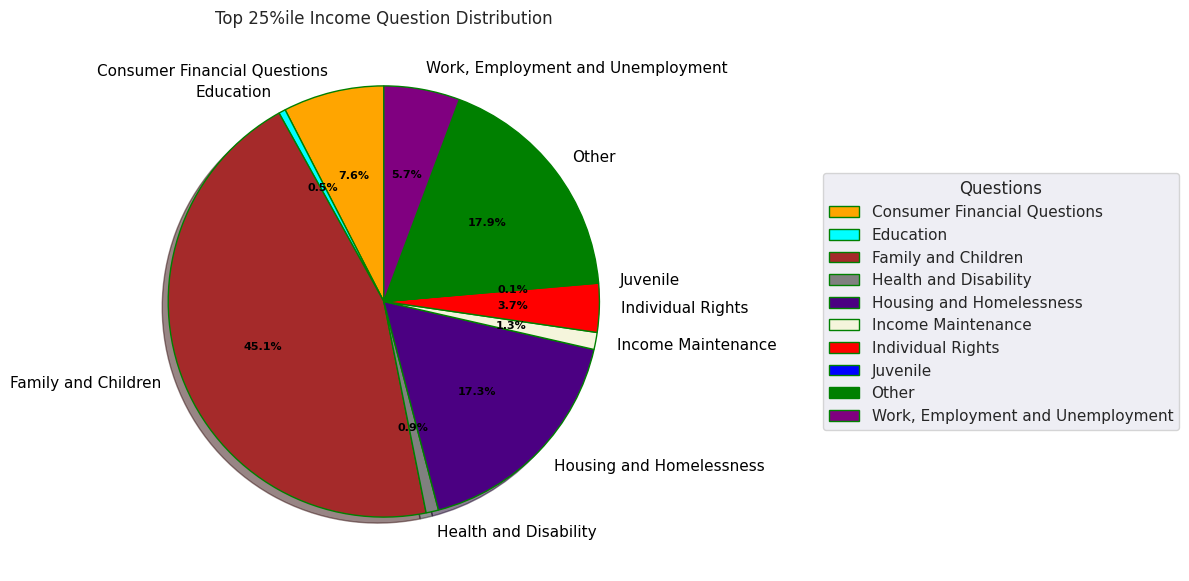

In [ ]:
# Creating dataset
labels = pie84.index
data = pie84.values
#explode = (0.1, 0.0, 0.3, 0.0, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0)

# Creating color parameters
colors = ( "orange", "cyan", "brown", "grey", "indigo", "beige", "red", "blue", "green", "purple")

# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }

# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%".format(pct, absolute)

# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data,
                                  autopct = lambda pct: func(pct, data),
                                  #explode = explode,
                                  labels = labels,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))

# Adding legend
ax.legend(wedges, labels,
          title ="Questions",
          loc ="center left",
          bbox_to_anchor =(1.3, 0, 0.5, 1))

plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Top 25%ile Income Question Distribution")

# show plot
plt.savefig('top25Income.png')
plt.show()

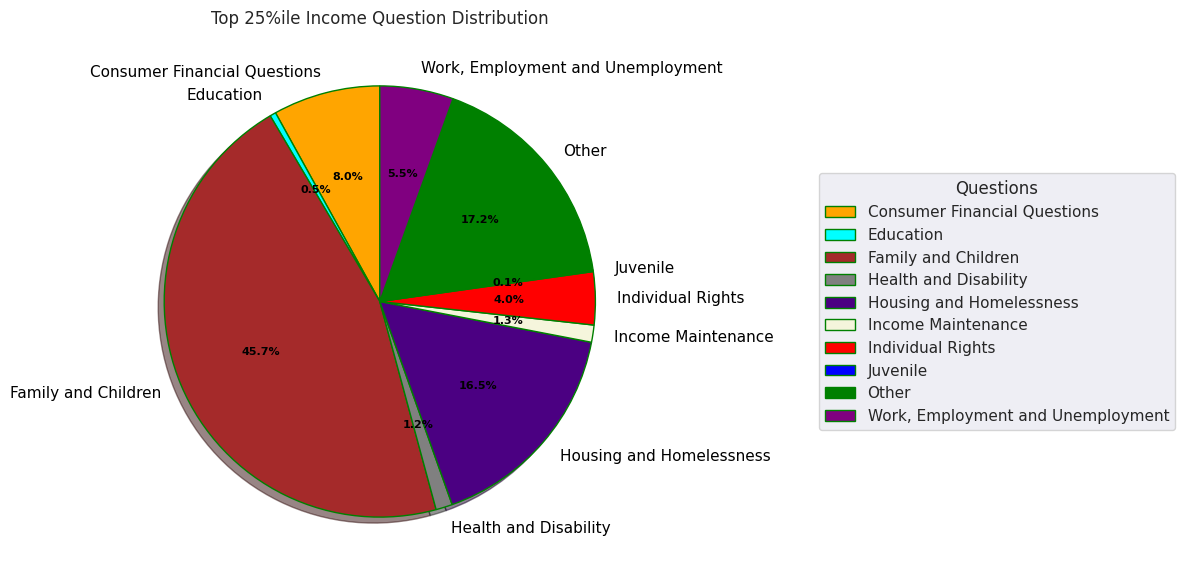

In [ ]:
pieall=pd.concat([df81,df82,df83,df84])
pieall=pieall.groupby('Category').size()
# Creating dataset
labels = pieall.index
data = pieall.values
#explode = (0.1, 0.0, 0.3, 0.0, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0)

# Creating color parameters
colors = ( "orange", "cyan", "brown", "grey", "indigo", "beige", "red", "blue", "green", "purple")

# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }

# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%".format(pct, absolute)

# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data,
                                  autopct = lambda pct: func(pct, data),
                                  #explode = explode,
                                  labels = labels,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))

# Adding legend
ax.legend(wedges, labels,
          title ="Questions",
          loc ="center left",
          bbox_to_anchor =(1.3, 0, 0.5, 1))

plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Top 25%ile Income Question Distribution")

# show plot
plt.savefig('AllIncome.png')
plt.show()

In [ ]:

df13=clean_data1.iloc[:,[13,15]]
df13['Classification']=0
for i in range(len(df13['Classification'])):
  if df13.iloc[i,0] < np.percentile(df13['InvestmentsBalance'],25):
    df13.iloc[i,2]=1
  if df13.iloc[i,0]>=np.percentile(df13['InvestmentsBalance'],25) and df13.iloc[i,0]<np.percentile(df13['InvestmentsBalance'],50):
    df13.iloc[i,2]=2
  if df13.iloc[i,0]>=np.percentile(df13['InvestmentsBalance'],50) and df13.iloc[i,0]<np.percentile(df13['InvestmentsBalance'],75):
    df13.iloc[i,2]=3
  if df13.iloc[i,0]>=np.percentile(df13['InvestmentsBalance'],75):
    df13.iloc[i,2]=4
df13

<ipython-input-41-333c4a8d3560>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df13['Classification']=0


InvestmentsBalance                      Category  Classification
69                  2400.0           Family and Children               3
333                  383.0      Housing and Homelessness               2
388                  180.0           Family and Children               1
412                 8000.0                         Other               3
456                  300.0  Consumer Financial Questions               2
...                    ...                           ...             ...
202666               900.0                     Education               2
202700              7648.0           Family and Children               3
202725             50000.0                         Other               4
202793               100.0                         Other               1
202839                60.0      Housing and Homelessness               1

[4442 rows x 3 columns]

In [ ]:
#group by genotype
g2= df13.groupby('Classification')
for id, id_df in g2:
  print(id)
  print(id_df)

1
        InvestmentsBalance                      Category  Classification
388                  180.0           Family and Children               1
1042                 200.0           Family and Children               1
1256                   0.0                         Other               1
1766                   5.0  Consumer Financial Questions               1
2007                   1.0  Consumer Financial Questions               1
...                    ...                           ...             ...
202483               200.0           Family and Children               1
202498                 6.0  Consumer Financial Questions               1
202584               200.0             Individual Rights               1
202793               100.0                         Other               1
202839                60.0      Housing and Homelessness               1

[1111 rows x 3 columns]
2
        InvestmentsBalance                           Category  Classification
333              

In [ ]:
df131=g2.get_group(1)
df131=df131.drop(['InvestmentsBalance'], axis=1)
pie131=df131.groupby('Category').size()
#plt.pie(pie81.values, labels = pie81.index)

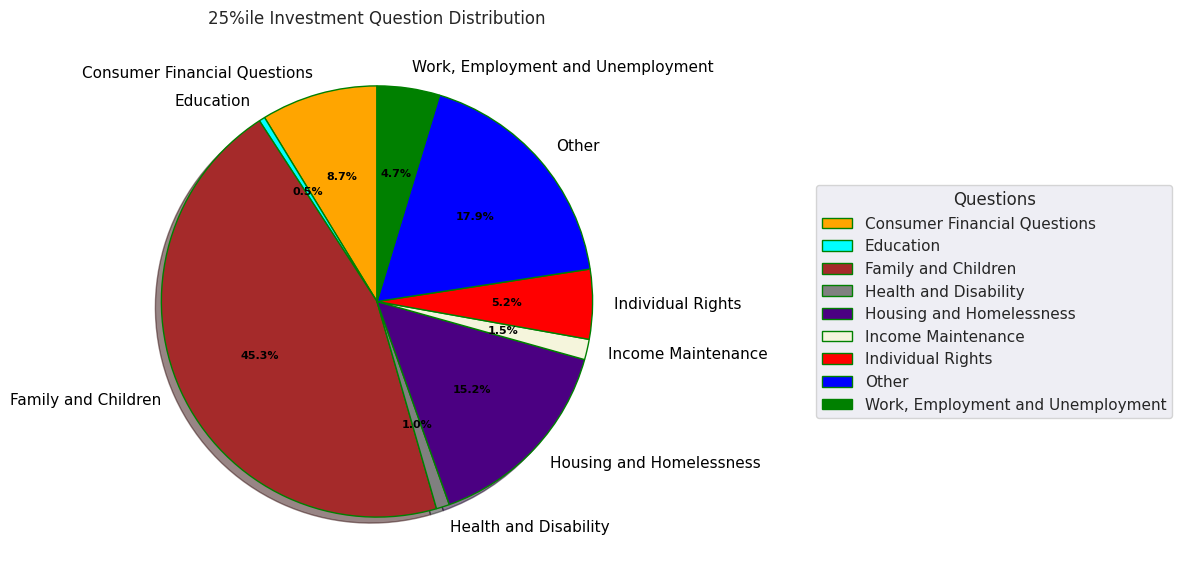

In [ ]:
# Creating dataset
labels = pie131.index
data = pie131.values
#explode = (0.1, 0.0, 0.3, 0.0, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0)

# Creating color parameters
colors = ( "orange", "cyan", "brown", "grey", "indigo", "beige", "red", "blue", "green", "purple")

# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }

# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%".format(pct, absolute)

# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data,
                                  autopct = lambda pct: func(pct, data),
                                  #explode = explode,
                                  labels = labels,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))

# Adding legend
ax.legend(wedges, labels,
          title ="Questions",
          loc ="center left",
          bbox_to_anchor =(1.3, 0, 0.5, 1))

plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("25%ile Investment Question Distribution")

# show plot
plt.show()

In [ ]:
df132=g2.get_group(2)
df132=df132.drop(['InvestmentsBalance'], axis=1)
pie132=df132.groupby('Category').size()
#plt.pie(pie81.values, labels = pie81.index)

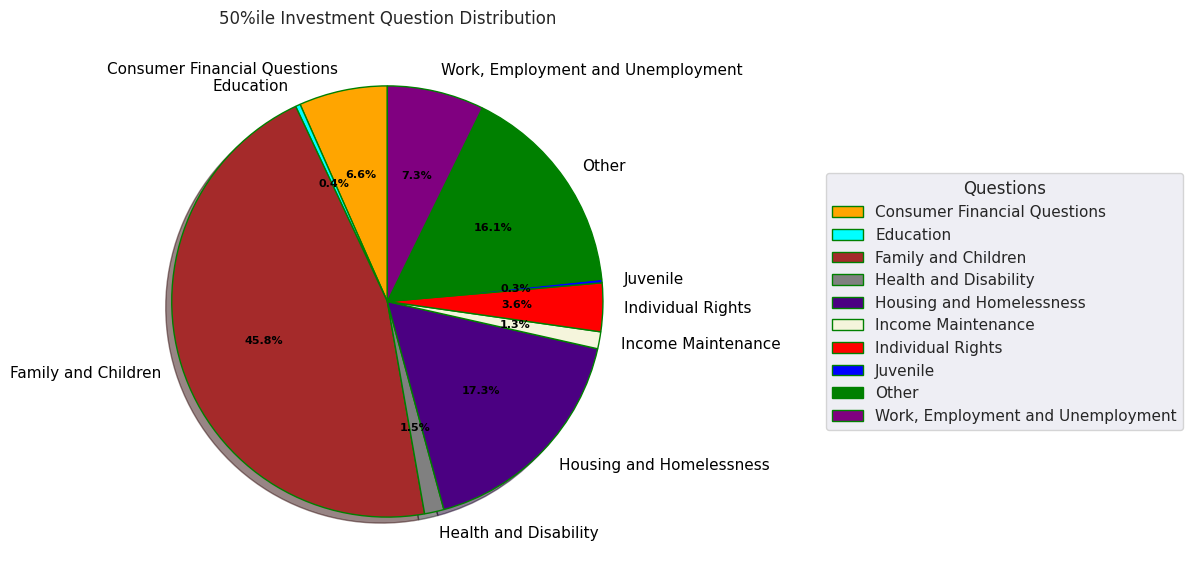

In [ ]:
# Creating dataset
labels = pie132.index
data = pie132.values
#explode = (0.1, 0.0, 0.3, 0.0, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0)

# Creating color parameters
colors = ( "orange", "cyan", "brown", "grey", "indigo", "beige", "red", "blue", "green", "purple")

# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }

# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%".format(pct, absolute)

# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data,
                                  autopct = lambda pct: func(pct, data),
                                  #explode = explode,
                                  labels = labels,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))

# Adding legend
ax.legend(wedges, labels,
          title ="Questions",
          loc ="center left",
          bbox_to_anchor =(1.3, 0, 0.5, 1))

plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("50%ile Investment Question Distribution")

# show plot
plt.show()

In [ ]:
df133=g2.get_group(3)
df133=df133.drop(['InvestmentsBalance'], axis=1)
pie133=df133.groupby('Category').size()
#plt.pie(pie81.values, labels = pie81.index)

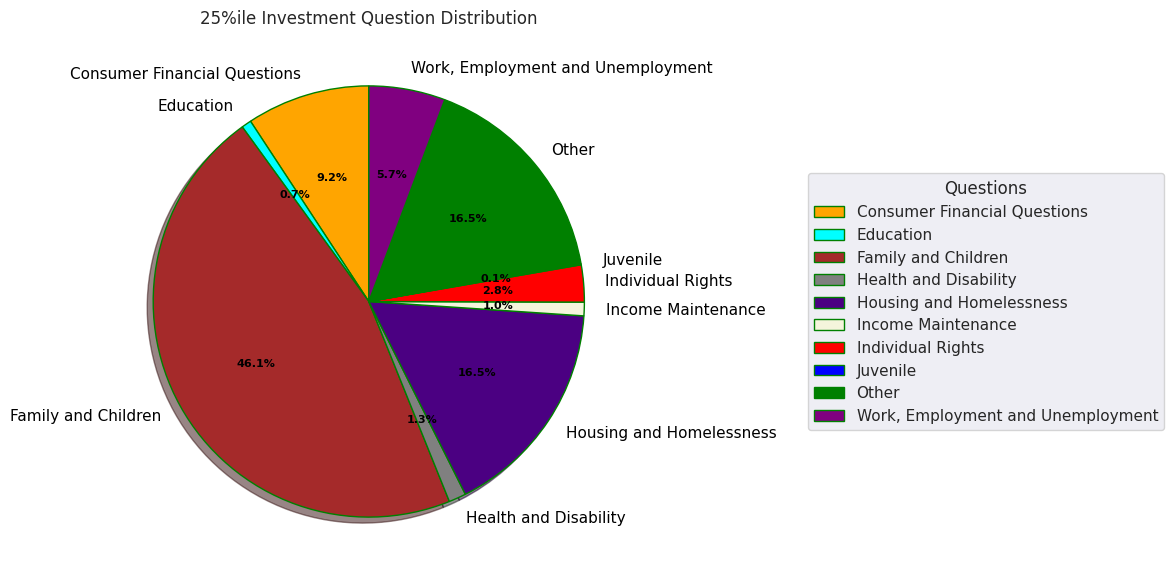

In [ ]:
# Creating dataset
labels = pie133.index
data = pie133.values
#explode = (0.1, 0.0, 0.3, 0.0, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0)

# Creating color parameters
colors = ( "orange", "cyan", "brown", "grey", "indigo", "beige", "red", "blue", "green", "purple")

# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }

# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%".format(pct, absolute)

# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data,
                                  autopct = lambda pct: func(pct, data),
                                  #explode = explode,
                                  labels = labels,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))

# Adding legend
ax.legend(wedges, labels,
          title ="Questions",
          loc ="center left",
          bbox_to_anchor =(1.3, 0, 0.5, 1))

plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("25%ile Investment Question Distribution")

# show plot
plt.show()

In [ ]:
df134=g2.get_group(4)
df134=df134.drop(['InvestmentsBalance'], axis=1)
pie134=df134.groupby('Category').size()
#plt.pie(pie81.values, labels = pie81.index)

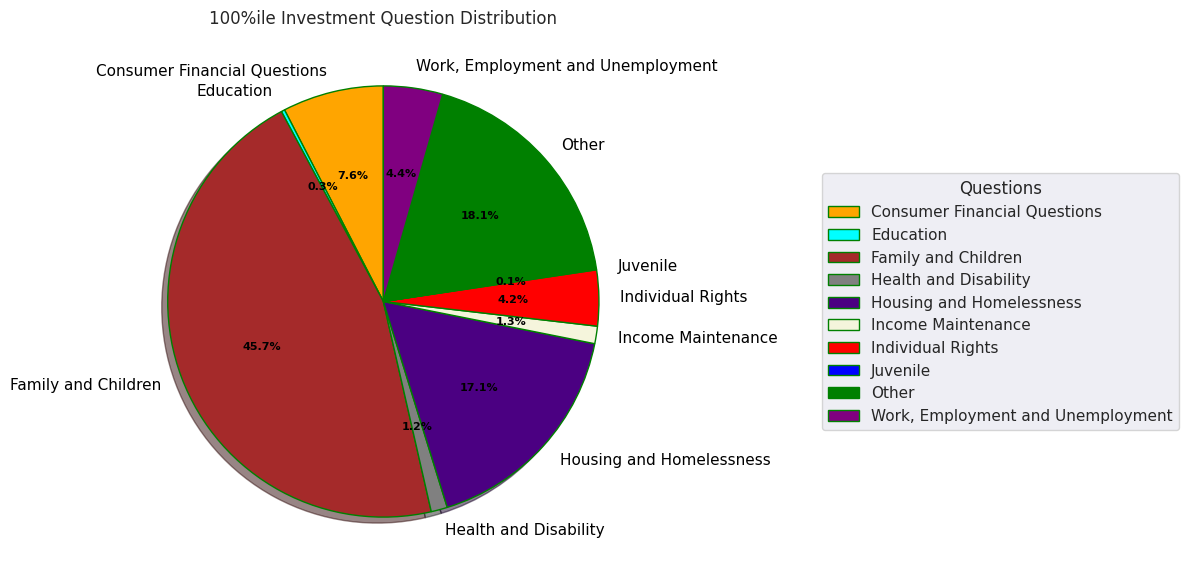

In [ ]:
# Creating dataset
labels = pie134.index
data = pie134.values
#explode = (0.1, 0.0, 0.3, 0.0, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0)

# Creating color parameters
colors = ( "orange", "cyan", "brown", "grey", "indigo", "beige", "red", "blue", "green", "purple")

# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }

# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%".format(pct, absolute)

# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data,
                                  autopct = lambda pct: func(pct, data),
                                  #explode = explode,
                                  labels = labels,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))

# Adding legend
ax.legend(wedges, labels,
          title ="Questions",
          loc ="center left",
          bbox_to_anchor =(1.3, 0, 0.5, 1))

plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("100%ile Investment Question Distribution")

# show plot
plt.show()